# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

In [53]:
sum(ames.BsmtFinSF2==0)

1293

In [34]:
columns = ames.columns
non_object_cols = []
for column in columns:
    if ames[column].dtype != object:
        if ames[column].nunique () > 20: non_object_cols.append(column)
sub_cat_ames = ames.loc[:,non_object_cols]
sub_cat_ames.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,1710,2003.0,548,0,61,0,0,0,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0,1262,1976.0,460,298,0,0,0,0,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,1786,2001.0,608,0,42,0,0,0,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,1717,1998.0,642,0,35,272,0,0,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0,2198,2000.0,836,192,84,0,0,0,250000


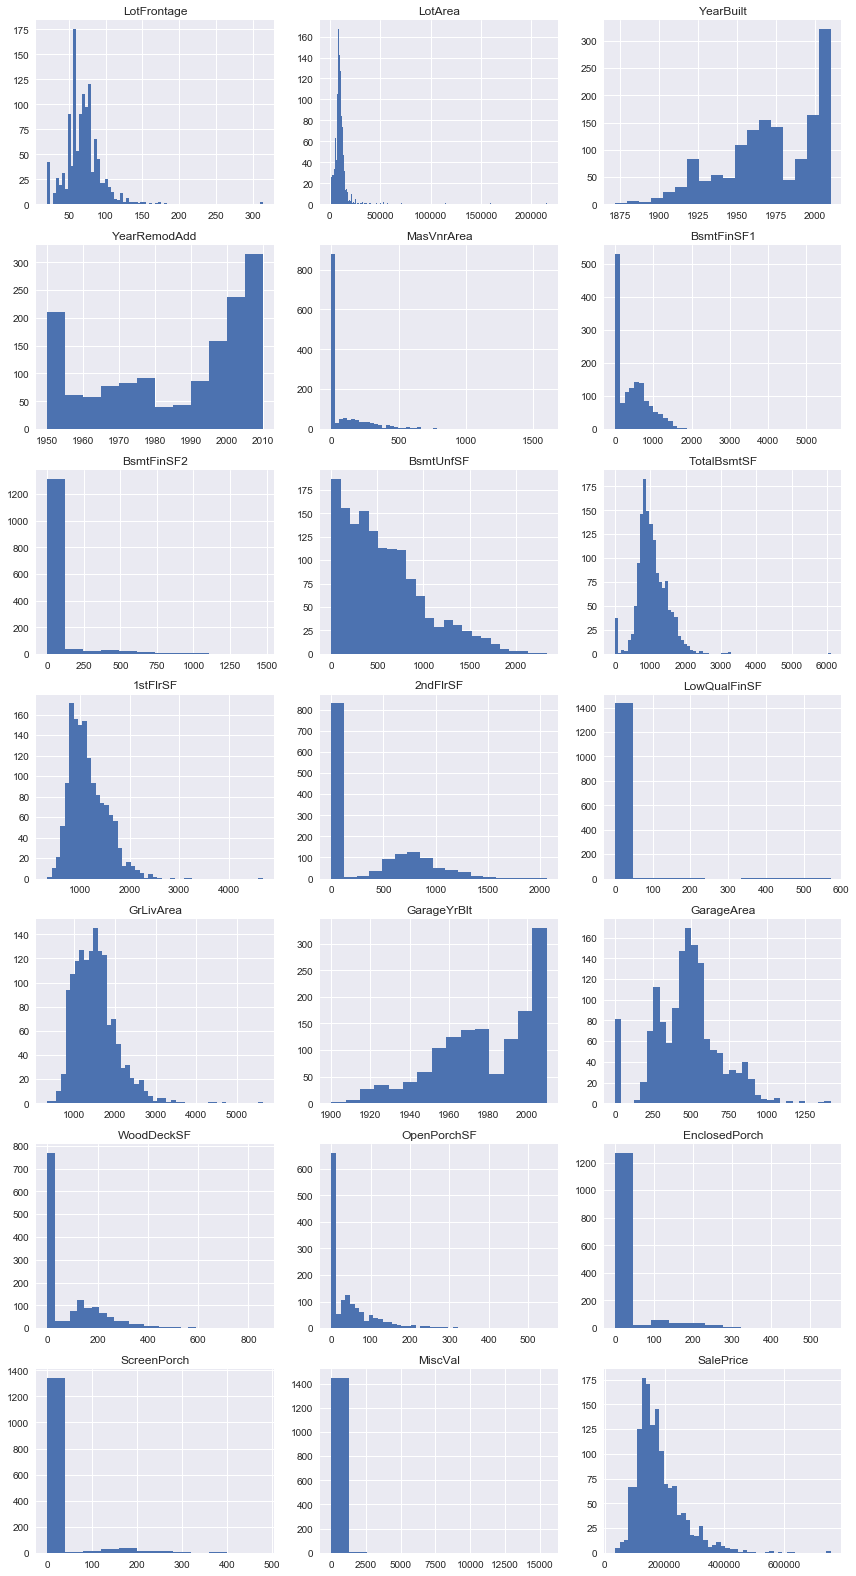

In [49]:
fig, axe = plt.subplots(nrows=sub_cat_ames.shape[1]//3,ncols=3,figsize = [12,sub_cat_ames.shape[1]])
categoricals = [column for column in sub_cat_ames.columns if column != 'Id']
for col, ax in zip(categoricals, axe.flatten()):
    ax.hist(ames[col].dropna(), bins='auto')
    ax.set_title(col)
fig.tight_layout()

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [58]:
# Select non zero-inflated continuous features as ames_cont
sub_cat = []
for column in sub_cat_ames:
    if sum(ames[column] == 0) == 0: sub_cat.append(column)
ames_cont = ames.loc[:,sub_cat]
ames_cont.drop('Id',axis=1).head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,GarageYrBlt,SalePrice
0,65.0,8450,2003,2003,856,1710,2003.0,208500
1,80.0,9600,1976,1976,1262,1262,1976.0,181500
2,68.0,11250,2001,2002,920,1786,2001.0,223500
3,60.0,9550,1915,1970,961,1717,1998.0,140000
4,84.0,14260,2000,2000,1145,2198,2000.0,250000


## Perform log transformations for the variables where it makes sense

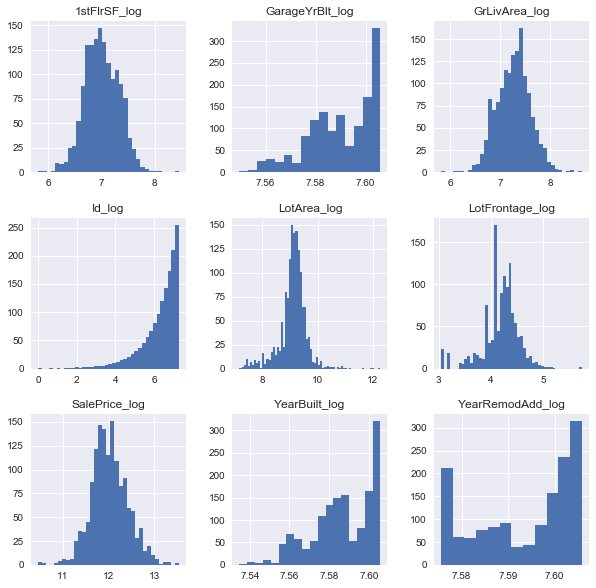

In [59]:
# Your code here
import numpy as np
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names
ames_log.hist(figsize=[10,10], bins ='auto')
fig.tight_layout();

In [ ]:
# #answer
# import numpy as np

# log_names = [f'{column}_log' for column in ames_cont.columns]

# ames_log = np.log(ames_cont)
# ames_log.columns = log_names
# ames_log.hist(figsize=(10, 10), bins='auto')
# fig.tight_layout();

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

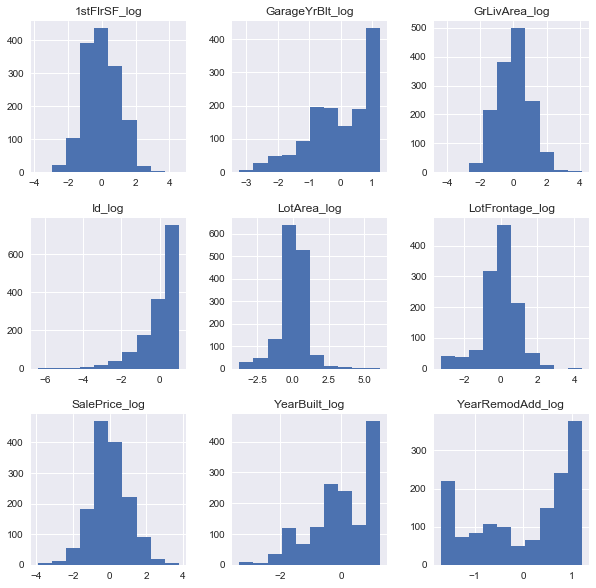

In [60]:
# Your code here
def norm(feature):
    return (feature-feature.mean())/feature.std()

features_final = ames_log.apply(norm)
features_final.hist(figsize = [10,10]);

In [ ]:
# #answer
# def normalize(feature):
#     return (feature - feature.mean()) / feature.std()

# features_final = ames_log.apply(normalize)

# features_final.hist(figsize  = [8, 8]);

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!